# Exploratory Data Analysis

This notebook explores the provided data sets.

### Overall Goals of this Analysis

We ultimately want to understand:

G1.  The state of labour market inactivity. Possible lenses to analyse this include: cross-country comparisons, breakdowns by demographic.

G2. Where Nesta can focus its efforts. This can be by identifying the key cross-sectional attributes that influnce economic inactivity.


## 0. Load the data provided

We have four files, with the first three pertaining to Labour Force Survey (LFS) data:
1. `variable_names.csv` - A list of the variables included in the lfs quarterly and monthly data sets 
2. `lfs_monthly_variables.csv` - Main labour market indicators collected through the UK labour force survey including data relating to international comparisons, and reasons for inactivity across demographic groups.
3. `lfs_quarterly_variables.csv` - Same as above. I assume this is the same data just aggregated to quarterly frequency. Verify this, and if so, use the monthly data for better granularity.
4. `qual_survey_responses.csv` - Independent survey responses from 100 participants across the UK to the question “What do you think the government should be doing to address economic  inactivity (unemployment)”


### Plan
First, we will analyse the `variable_names` to understand the available fields and identify which may be useful in understanding the state of labour market inactivity. 
We will group these into:

- (A) Fields that can help us understand international comparisons, i.e. the UK's employment rate relative to other countries;
- (B) Fields that can give cross-sectional breakdowns of inactivity by demographic within the UK, e.g. sex, age, region, educational attainment, ethnicity, disability.

Secondly, analyse the shortlisted fields in `lfs_monthly_variables` and note interesting findings relevant to the goals of this notebook.

Thirdly, confirm that `lfs_quarterly_variables` is simply an aggregated view of the monthly data. If so, we can ignore this.

Lastly, the qualitative survey data in `qual_survey_responses` is less likely to be relevant for the current task, but we will explore the data to see if there are any immediate takeaways.

In [1]:
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd
import plotly
import plotly.express as px

In [2]:
DATA_DIR = Path.cwd().parent / 'data'
DATA_FILEPATHS = list(DATA_DIR.glob('*'))

print(DATA_FILEPATHS)

[PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/lfs_quarterly_variables.csv'), PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/lfs_monthly_variables.csv'), PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/qual_survey_responses.csv'), PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/variable_names.csv')]


## 1. Variable Names

Identify relevant fields of the LFS monthly data for further analysis.


### Glossary of relevant terms
- LFS: Labour Force Survey
- AWE: Average weekly Earnings
- ASHE: Annual Survey of Hours and Earnings
- ILO: International Labour Organization

In [3]:
var_df = pd.read_csv(str(DATA_FILEPATHS[3]), encoding="ISO-8859-1")
var_df

,Title
0,AWE: Whole Economy Real Terms Year on Year Sin...
1,AWE: Whole Economy Real Terms Year on Year thr...
2,AWE: Whole Economy Real Terms Level (£): Seaso...
3,AWE: Whole Economy Real Terms Year on Year Sin...
4,AWE: Whole Economy Real Terms Year on Year Thr...
...,...
1825,STANDARDISED ILO UNEMPLOYMENT RATES SEASONALLY...
1826,STANDARDISED ILO UNEMPLOYMENT RATES SEASONALLY...
1827,STANDARDISED ILO UNEMPLOYMENT RATES SEASONALLY...
1828,STANDARDISED ILO UNEMPLOYMENT RATES SEASONALLY...


There are a lot of fields... There are many with similar names which suggests they will be useful for comparisons of different countries or demographics. 

Group these together by stemming the field names to the first few words.

In [37]:
def preprocess_field_name(field_name: str) -> str:
    """Some of the field names have naming inconsistencies, so preprocess these for consistency"""
    return (
        field_name
        .lower()  # Some fields are sentence case, others are upper case. Cast all to lower case
        .replace(':', '')
        .replace('.', '')
        .replace("economically", "econ")  # Some fields abbreviate economially whereas others don't
        .replace("economic", "econ")  # Some fields abbreviate economic whereas others don't
        .replace("inactivity", "inact", )  # Some fields abbreviate inactivity whereas others don't
        .replace("education", "educ")  # Some fields abbreviate education whereas others don't
    )

In [38]:
var_df['Title'].apply(lambda s: preprocess_field_name(s))

0       awe whole economy real terms year on year sing...
1       awe whole economy real terms year on year thre...
2       awe whole economy real terms level (£) seasona...
3       awe whole economy real terms year on year sing...
4       awe whole economy real terms year on year thre...
                              ...                        
1825    standardised ilo unemployment rates seasonally...
1826    standardised ilo unemployment rates seasonally...
1827    standardised ilo unemployment rates seasonally...
1828    standardised ilo unemployment rates seasonally...
1829    standardised ilo unemployment rates seasonally...
Name: Title, Length: 1830, dtype: object

In [39]:
# Stem to the first N words
N_WORDS = 3
stemmed_title = (var_df['Title']
                 .apply(lambda s: preprocess_field_name(s))
                 .str.split(' ')
                 .str[:N_WORDS]
                 .str.join(' '))

# Alternatively, stem by character count
# stemmed_title = var_df['Title'].str[:20]

In [41]:
px.bar(stemmed_title.value_counts().sort_index())

In [11]:
pd.options.display.max_rows = 100

In [42]:
var_df[var_df['Title'].apply(lambda s: preprocess_field_name(s)).str.contains("lfs econ inact")].head(100)

,Title
71,LFS: Econ. inactive: Aged 16-17: Not in full-t...
72,LFS: Econ. inactive: Aged 18-24: Not in full-t...
73,LFS: Econ. inactive: Aged 16-24: Not in full-t...
74,LFS: Econ. inactive: Aged 16-17: Not in full-t...
75,LFS: Econ. inactive: Aged 18-24: Not in full-t...
76,LFS: Econ. inactive: Aged 16-24: Not in full-t...
77,LFS: Econ. inactive: Aged 16-17: Not in full-t...
78,LFS: Econ. inactive: Aged 18-24: Not in full-t...
79,LFS: Econ. inactive: Aged 16-24: Not in full-t...
80,LFS: Econ. inactive: Aged 16-17: In full-time ...


From the above plot and manual checking of the field names, potentially useful avenues to research further are:

- `AWE: Whole Economy Real Terms Level (£): Seasonally Adjusted Total Pay`
- `STANDARDISED ILO UNEMPLOYMENT RATES SEASONALLY ADJUSTED`
    - Split by countries. Compare G7 countries.
    - Alternatively `International Comparison Employment Rates`
- `LFS: Econ. inactivity rate` and `LFS: Economic inactivity rate` and `LFS: Economic Inactivity` and `LFS: Econ inactive`
    - Split by demographic (region/age/sex), lots of fields.
- `LFS: Employment rate`
    - Split by sex and age
- `LFS: Usual weekly hrs of work` and `LFS: Usual weekly hours of work`
- `LFS: Econ. inactivity reasons`
    - Retired, discouraged, long-term sick, etc
    - Split by total and female
- `LFS: Econ. inactivity wants a job` and `LFS: Econ. inactivity does not want a job`
    - reasons for inactivity, e.g. Looking after family
- `16-17 year old population`, `16-17 year old total in FTE` and `16-17 year old total not in FTE`
    - Same for 18-24
    - Focus on young people if deep-dive needed
- `LFS: Employment` and `LFS: Economic Activity`
- `Employment rates by country of birth` and `Employment rates by nationality`
- `UK Job Vacancies`

## 2. LFS Monthly


Load and pre-process the data

In [14]:
str(DATA_FILEPATHS[1])

'/Users/gurpreetjohl/workspace/python/growingeconomy/data/lfs_monthly_variables.csv'

In [44]:
lfs_df = pd.read_csv(
    str(DATA_FILEPATHS[1]),
    header=[0],
    skiprows=[1,2,3],  # The CDID, PreUnit and Unit headers aren't needed 
    encoding="ISO-8859-1",  # Some of the PreUnit values seem to cause decoding issues with the default utf-8 encoding
    parse_dates=['Title'],
    date_format="%Y %b"  # Parse dates from "2024 JAN" format
)
lfs_df = lfs_df.rename(columns={'Title': 'Date'})
lfs_df = lfs_df.set_index("Date")
lfs_df.columns = [preprocess_field_name(k) for k in lfs_df.columns]

lfs_df

,awe whole economy real terms year on year single month growth (%) seasonally adjusted regular pay,awe whole economy real terms year on year three month growth (%) seasonally adjusted regular pay,awe whole economy real terms level (£) seasonally adjusted regular pay,awe whole economy real terms year on year single month growth (%) seasonally adjusted total pay,awe whole economy real terms year on year three month growth (%) seasonally adjusted total pay,awe whole economy real terms level (£) seasonally adjusted total pay,employment rate canada (oecd) seasonally adjusted,employment rate japan (oecd) seasonally adjusted,employment rate united states (oecd) seasonally adjusted,"standardised ilo unemployment rates, seasonally adjusted, romania - eurostat",...,standardised ilo unemployment rates seasonally adjusted luxembourg - eurostat,standardised ilo unemployment rates seasonally adjusted netherlands - eurostat,standardised ilo unemployment rates seasonally adjusted austria - eurostat,standardised ilo unemployment rates seasonally adjusted portugal - eurostat,standardised ilo unemployment rates seasonally adjusted finland - eurostat,standardised ilo unemployment rates seasonally adjusted sweden - eurostat,standardised ilo unemployment rates seasonally adjusted united kingdom eurostat,standardised ilo unemployment rates seasonally adjusted united states,standardised ilo unemployment rates seasonally adjusted japan- eurostat,standardised ilo unemployment rates seasonally adjusted canada-oecd
Date,,,,,,,,,,,,,,,,,,,,,
1992-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9
1992-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7
1992-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9
1992-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.4
1992-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,2.0,1.5,482.0,1.4,1.5,513.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01,1.9,1.8,481.0,1.6,1.4,513.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,1.7,1.9,481.0,1.4,1.5,513.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Date'>

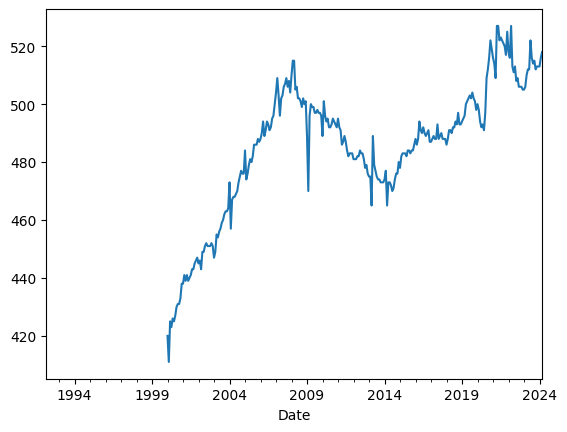

In [45]:
lfs_df['awe whole economy real terms level (£) seasonally adjusted total pay'].plot()

### 2.2. Extension to GDP

The ultimate mission is to grow the economy, so a proxy of the economy is important. I have downloaded GDP data from https://www.ons.gov.uk/economy/grossdomesticproductgdp/datasets/monthlygdpandmainsectorstofourdecimalplaces

TODO: Another approach to picking out important fields is to train a random forest classifier on the data and use the feature importances to determine any pertinent fields that may have been missed when examining the fields "by eye".

## 3. LFS Quarterly

## 4. Survey responses

Independent survey responses
from 100 participants across
the UK to the question “what
do you think the government
should be doing to address
economic inactivity
(unemployment)”.

Single response survey
collected 15 July 2024.

In [33]:
str(DATA_FILEPATHS[2])

'/Users/gurpreetjohl/workspace/python/growingeconomy/data/qual_survey_responses.csv'

In [34]:
survey_df = pd.read_csv(str(DATA_FILEPATHS[2]))
survey_df

,Participant ID,Employment Status,UK Region,Response
0,P001,Unemployed,Scotland,The government should focus on providing more ...
1,P002,Employed,North West,I believe the government should create more in...
2,P003,Self-employed,London,The government needs to address the root cause...
3,P004,Unemployed,Wales,The government should increase unemployment be...
4,P005,Employed,South East,I think the government is already doing too mu...
...,...,...,...,...
105,P106,Employed,East of England,I think the government should focus on promoti...
106,P107,Unemployed,West Midlands,The government needs to improve support for pe...
107,P108,Self-employed,North East,The government should focus on supporting the ...
108,P109,Unemployed,Scotland,The government should provide more support for...


In [36]:
survey_df['Response']

0      The government should focus on providing more ...
1      I believe the government should create more in...
2      The government needs to address the root cause...
3      The government should increase unemployment be...
4      I think the government is already doing too mu...
                             ...                        
105    I think the government should focus on promoti...
106    The government needs to improve support for pe...
107    The government should focus on supporting the ...
108    The government should provide more support for...
109    I believe the government should implement stri...
Name: Response, Length: 110, dtype: object